In [2]:
import rtde_control
import rtde_receive
import numpy as np
import sys
import cv2
import yaml
from matplotlib import pyplot as plt
import time
sys.path.append("../")

%load_ext autoreload
%autoreload 2


In [3]:

ultrasoud_vid = cv2.VideoCapture('/dev/video8')

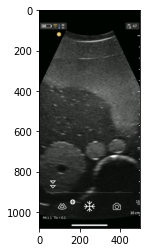

In [4]:
ret, frame = ultrasoud_vid.read()		
plt.imshow(frame)

In [5]:
rtde_c = rtde_control.RTDEControlInterface("192.168.1.2")
rtde_r = rtde_receive.RTDEReceiveInterface("192.168.1.2")

In [6]:
import pickle 
# Load previously recorded waypoints
with open('wps.pkl','rb') as f:
    waypoints = pickle.load(f)
with open('wrench_zero.pkl','rb') as f:
    wrench_zero = pickle.load(f)


In [7]:
# Rescale the grid density if needed
n_x = 25
n_y = 25
xmin,xmax = min([w[0] for w in waypoints]),max([w[0] for w in waypoints])
ymin,ymax = min([w[1] for w in waypoints]),max([w[1] for w in waypoints])

mesh = np.meshgrid(np.linspace(xmin,xmax,n_x),np.linspace(ymin,ymax,n_y))

mesh[0] = mesh[0].flatten()
mesh[1] = mesh[1].flatten()
depth = waypoints[0][2]
orientation = waypoints[0][3:]
waypoints = [[mesh[0][i],mesh[1][i],depth]+orientation  for i in range(len(mesh[0]))]

In [9]:

rtde_c.moveL(waypoints[0], speed = 0.03,acceleration = 0.1)

True

# Data size chart
10x10 grid: 162 MB

25x25 grid: 1.0 GB

50x50 grid: 4.0 GB. Could cause the ipykernel to crash on a 8GB RAM laptop if attempt to store all the data in memory.

In [10]:
frames = []
zforces = []
wrenches = []
for i,w in enumerate(waypoints):
    rtde_c.moveL(w, speed = 0.01,acceleration = 0.1)
    
    # time.sleep(0.5) # Stabilizing.

    ret,frame = ultrasoud_vid.read()
    frames.append(frame)
    
    wrench= np.array(rtde_r.getActualTCPForce())-np.array(wrench_zero)
    
    wrenches.append(wrench)
    zforces.append(wrench[2])

    print('waypoint',i,'force z',wrench[2])

waypoint 0 force z 16.787523166547476
waypoint 1 force z 15.575007885561057
waypoint 2 force z 14.119002716084765
waypoint 3 force z 12.92456507543088
waypoint 4 force z 12.012913765165873
waypoint 5 force z 10.879055466059231
waypoint 6 force z 9.784801949891246
waypoint 7 force z 9.031952792922663
waypoint 8 force z 7.988863897883471
waypoint 9 force z 7.453239694711909
waypoint 10 force z 6.727777325700002
waypoint 11 force z 6.514747998073949
waypoint 12 force z 6.30274749054734
waypoint 13 force z 5.952609199614518
waypoint 14 force z 5.50784349029025
waypoint 15 force z 5.352589655101582
waypoint 16 force z 5.196668412951837
waypoint 17 force z 4.667578481229363
waypoint 18 force z 4.719101428008628
waypoint 19 force z 4.177014212376532
waypoint 20 force z 4.457881764833218
waypoint 21 force z 4.406222260653548
waypoint 22 force z 4.285315595000956
waypoint 23 force z 4.379613264418175
waypoint 24 force z 4.480552178463922
waypoint 25 force z 19.63226573162625
waypoint 26 force z

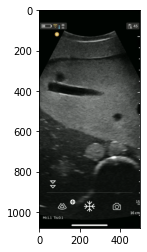

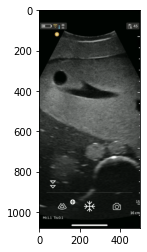

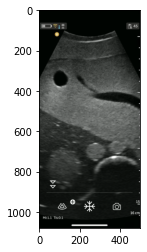

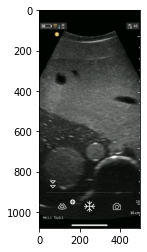

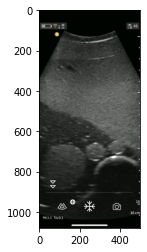

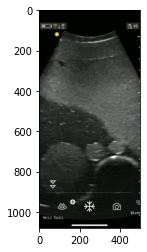

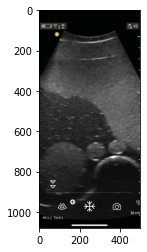

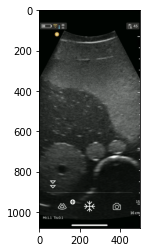

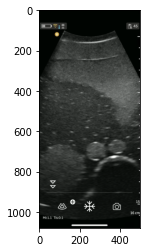

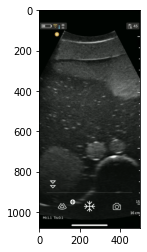

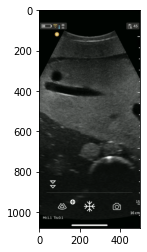

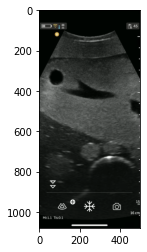

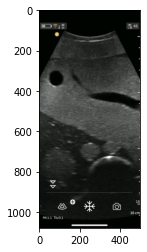

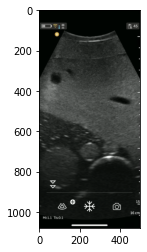

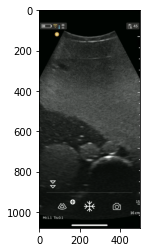

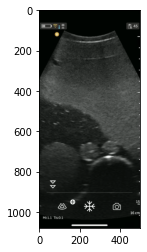

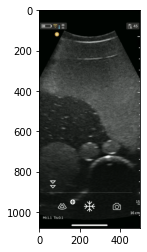

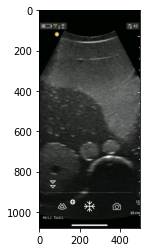

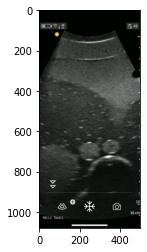

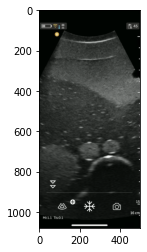

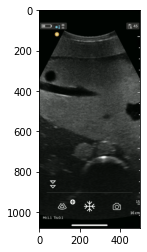

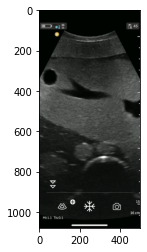

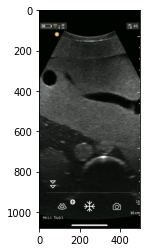

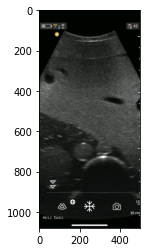

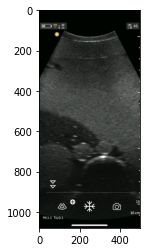

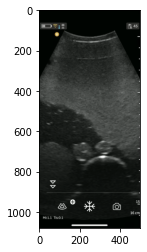

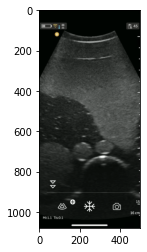

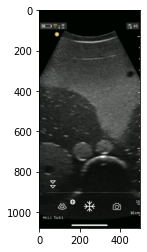

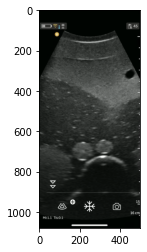

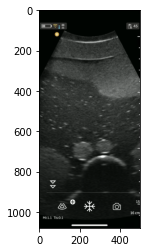

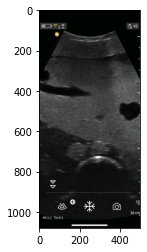

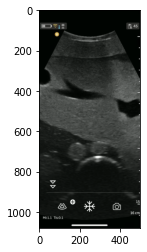

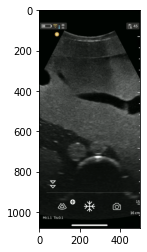

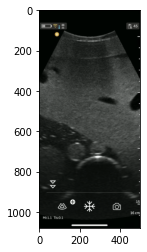

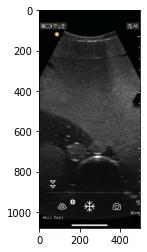

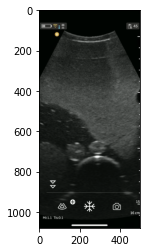

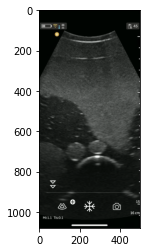

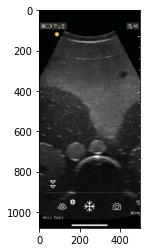

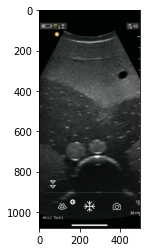

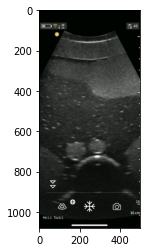

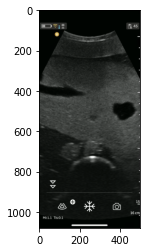

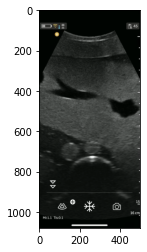

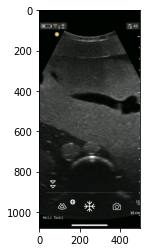

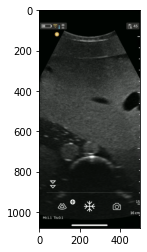

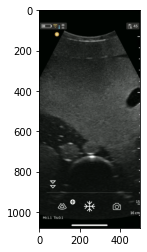

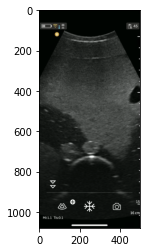

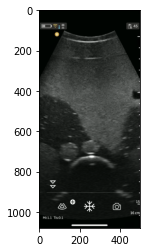

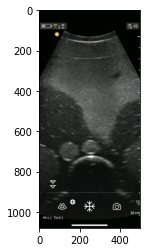

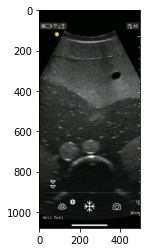

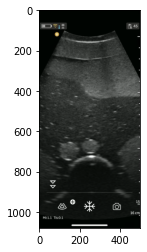

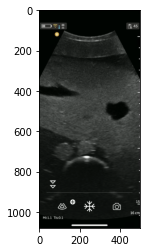

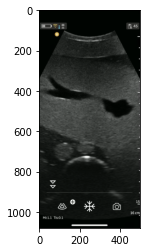

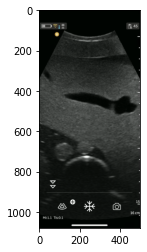

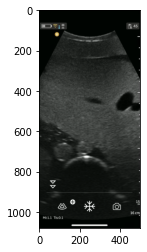

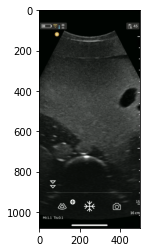

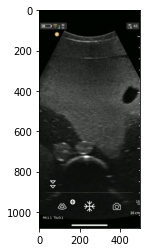

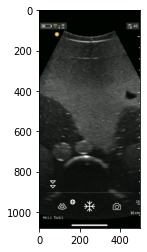

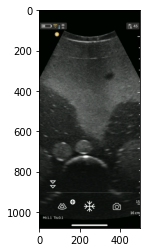

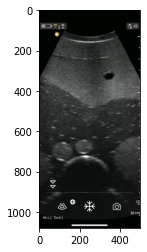

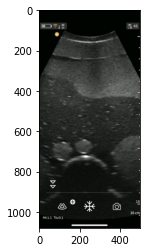

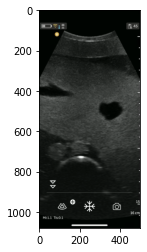

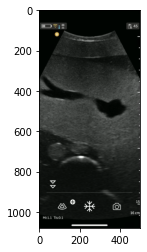

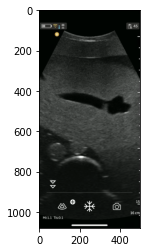

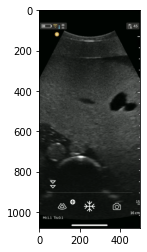

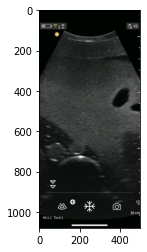

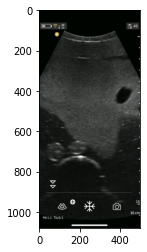

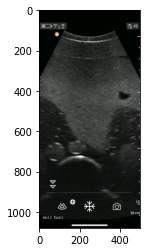

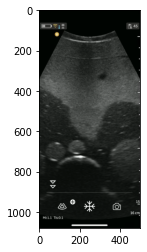

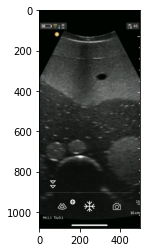

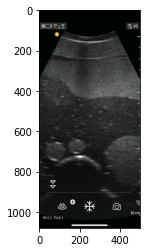

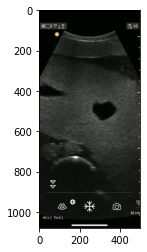

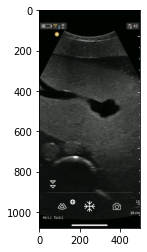

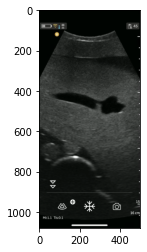

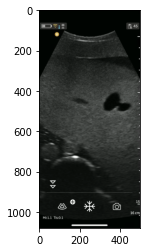

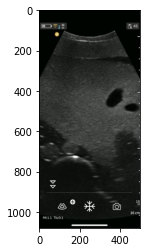

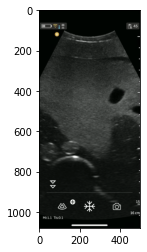

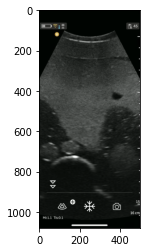

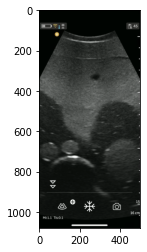

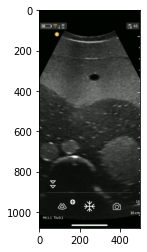

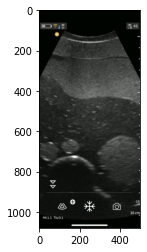

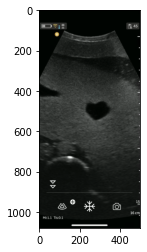

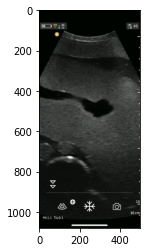

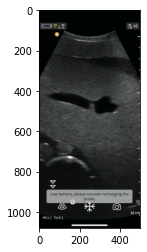

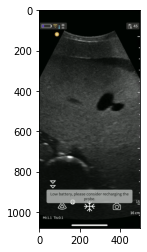

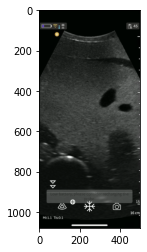

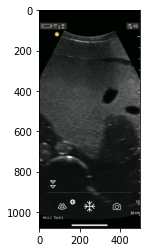

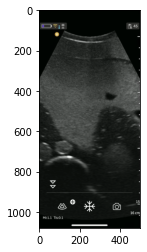

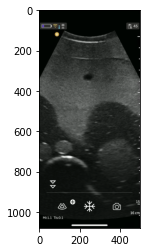

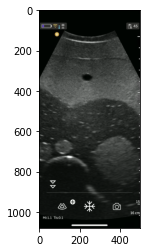

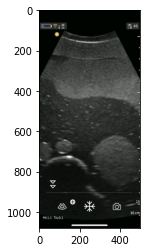

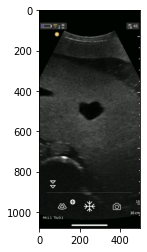

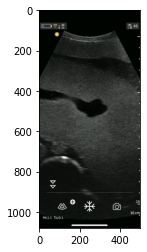

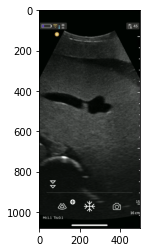

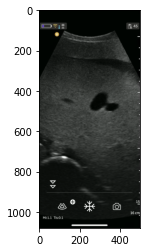

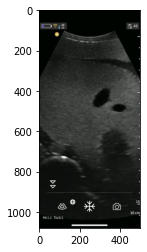

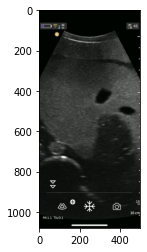

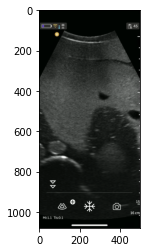

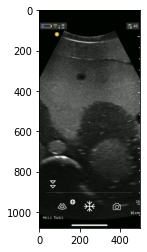

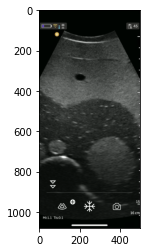

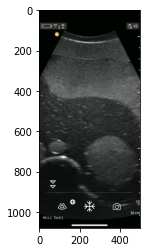

In [25]:
for f in frames:
    plt.imshow(f)
    plt.show()

In [11]:
with open('linear_scan_25.pkl','wb') as f:
    pickle.dump({'waypoints':waypoints,'frames':frames, 'zforces':zforces, 'wrenches':wrenches},f)

In [12]:
ultrasoud_vid.release()